In [ ]:
# import libraries
import pandas as pd # mengolah dataset
import numpy as np # kalkulasi dataset
import seaborn as sns # visualisasi
import matplotlib.pyplot as plt # visualisasi
import math # normal kalkulasi

# Data Reading

## Header Label

*   Age = Usia dalam tahun, linear
*   Gender = Kelamin (0 = Laki-Laki | 1 = Perempuan), nominal
*   Height = Tinggi dalam centimeter(cm), linear
*   Weight = Berat dalam kilogram(kg), linear
*   QRS_Duration = Durasi rata-rata QRS dalam milisekon, linear
*   P-R_Interval = Durasi rata-rata antara timbulnya gelombang P dan Q dalam milisekon, linear
*   Q-T_Interval = Durasi rata-rata antara onset Q dan offset gelombang dalam milisekon, linear
*   T_Interval = Durasi rata-rata gelombang T dalam milisekon, linear
*   P_Interval = Durasi rata-rata gelombang P dalam milisekon, linear
# Sudut vektor dalam derajat pada bidang depan, linier
*   QRS = Gabungan dari gelombang Q, R, dan S
*   T = Ventricular Repolarization
*   P = Depolarisasi listrik atrium
*   QRST = Lamanya waktu antara depolarisasi ventrikel (gelombang Q) dan repolarisasi (gelombang T)
*   J = Defleksi positif terjadi di persimpangan antara QRS dan segmen ST
*   Heart_Rate = Jumlah detak jantung per menit, linear
# Of Channel D1, rata-rata lebar dalam milisekon, linear
*   Q_D1 = Gelombang Q
*   R_D1 = Gelombang R
*   S_D1 = Gelombang S
*   R'_D1 = Gelombang R', gelombang tepat kecil setelah gelombang R
*   S'_D1 = Gelombang S'
*   NOD_D1 = Jumlah defleksi intrinsik, linier
*   EOR_R_D1 = Keberadaaan gelombang R yang kasar, nominal
*   EOD_R_D1 = Keberadaaan diphastic derivation gelombang R, nominal
*   EOR_P_D1 = Keberadaaan gelombang P yang kasar, nominal
*   EOD_P_D1 = Keberadaaan diphastic derivation gelombang P, nominal
*   EOR_T_D1 = Keberadaaan gelombang T yang kasar, nominal
*   EOD_T_D1 = Keberadaaan diphastic derivation gelombang T, nominal
# Of Channel D2
*   Q_D2 ... EOD_T_D2 (mirip seperti Of Channel D1, dst...)
# Of Channel D3
*   Q_D3 ... EOD_T_D3
# Of Channel AVR
*   Q_AVR ... EOD_T_AVR
# Of Channel AVL
*   Q_AVL ... EOD_T_AVL
# Of Channel AVF
*   Q_AVF ... EOD_T_AVF
# Of Channel V1 ... V6
*   Q_[V1...V6] ... EOD_T_[V1...V6]
# Of Channel D1, amplitudo, * 0.1 milivolt, Of
*   A_JJ_D1
*   A_Q_D1
*   A_R_D1
*   A_S_D1
*   A_R'_D1
*   A_S'_D1
*   A_P_D1
*   A_T_D1
*   QRSA_D1 = Jumlah luas semua segmen dibagi 10, (Luas = lebar * tinggi / 2), linear
*   QRSTA_D1 = QRSA + 0.5 * lebar gelombang T * 0.1 * tinggi  gelombang T, linear
# Of Channel D2
*   A_[...]_D2 ... QRSTA_D2 (sama seperti D1 (amplitudo), dst ...)
# Of Channel D3
*   A_[...]_D3 ... QRSTA_D3
# Of Channel AVR
*   A_[...]_AVR ... QRSTA_AVR
# Of Channel AVL
*   A_[...]_AVL ... QRSTA_AVL
# Of Channel AVF
*   A_[...]_AVF ... QRSTA_AVF
# Of Channel V1...V6
*   A_[...]__[V1...V6] ... QRSTA__[V1...V6]

# Distribusi Class Arrhythmia ('Class_Label')
*   1 = Normal
*   2 = Ischemic changes (Coronary Artery Disease)
*   3 = Old Anterior Mydocardial Infarction
*   4 = Old Inferior Myocardial Infarction
*   5 = Sinus tachycardy
*   6 = Sinus bradycardy
*   7 = Ventricular Premature Contractio (PVC)
*   8 = Supraventricular Premature Contraction
*   9 = Left bundle branch block
*   10 = Right bundle branch block
*   11 = 1. degree AtrioVentricular block
*   12 = 2. degree AV block
*   13 = 3. degree AV block
*   14 = Left ventricule hypertrophy
*   15 = Atrial Fibrillation or Flutter
*   16 = Others

Untuk mengsimplifikasi data distrbusi class aritmia
maka akan dirubah menjadi [2...16] positif aritimia (1) dan 1 negative aritmia (0)






In [ ]:
# Membaca dataset arrhytmia dari website yang sudah ditentukan
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data', header=None)
# Menambahkan header ke dataframe
column_names = ['Age','Gender','Height','Weight','QRS_Duration','P-R_Interval','Q-T_Interval','T_Interval',
                'P_interval','QRS','T','P','QRST','J','Heart_Rate','Q_D1','R_D1','S_D1','R\'_D1','S\'_D1',
                'NOD_D1','EOR_R_D1','EOD_R_D1','EOR_P_D1','EOD_P_D1','EOR_T_D1','EOD_T_D1','Q_D2','R_D2',
                'S_D2','R\'_D2','S\'_D2','NOD_D2','EOR_R_D2','EOD_R_D2','EOR_P_D2','EOD_P_D2','EOR_T_D2',
                'EOD_T_D2','Q_D3','R_D3','S_D3','R\'_D3','S\'_D3','NOD_D3','EOR_R_D3','EOD_R_D3','EOR_P_D3',
                'EOD_P_D3','EOR_T_D3','EOD_T_D3','Q_AVR','R_AVR','S_AVR','R\'_AVR','S\'_AVR','NOD_AVR',
                'EOR_R_AVR','EOD_R_AVR','EOR_P_AVR','EOD_P_AVR','EOR_T_AVR','EOD_T_AVR','Q_AVL','R_AVL',
                'S_AVL','R\'_AVL','S\'_AVL','NOD_AVL','EOR_R_AVL','EOD_R_AVL','EOR_P_AVL','EOD_P_AVL',
                'EOR_T_AVL','EOD_T_AVL','Q_AVF','R_AVF','S_AVF','R\'_AVF','S\'_AVF','NOD_AVF','EOR_R_AVF',
                'EOD_R_AVF','EOR_P_AVF','EOD_P_AVF','EOR_T_AVF','EOD_T_AVF','Q_V1','R_V1','S_V1','R\'_V1',
                'S\'_V1','NOD_V1','EOR_R_V1','EOD_R_V1','EOR_P_V1','EOD_P_V1','EOR_T_V1','EOD_T_V1','Q_V2',
                'R_V2','S_V2','R\'_V2','S\'_V2','NOD_V2','EOR_R_V2','EOD_R_V2','EOR_P_V2','EOD_P_V2','EOR_T_V2',
                'EOD_T_V2','Q_V3','R_V3','S_V3','R\'_V3','S\'_V3','NOD_V3','EOR_R_V3','EOD_R_V3','EOR_P_V3',
                'EOD_P_V3','EOR_T_V3','EOD_T_V3','Q_V4','R_V4','S_V4','R\'_V4','S\'_V4','NOD_V4','EOR_R_V4',
                'EOD_R_V4','EOR_P_V4','EOD_P_V4','EOR_T_V4','EOD_T_V4','Q_V5','R_V5','S_V5','R\'_V5','S\'_V5',
                'NOD_V5','EOR_R_V5','EOD_R_V5','EOR_P_V5','EOD_P_V5','EOR_T_V5','EOD_T_V5','Q_V6','R_V6','S_V6',
                'R\'_V6','S\'_V6','NOD_V6','EOR_R_V6','EOD_R_V6','EOR_P_V6','EOD_P_V6','EOR_T_V6','EOD_T_V6',
                'A_JJ_D1','A_Q_D1','A_R_D1','A_S_D1','A_R\'_D1','A_S\'_D1','A_P_D1','A_T_D1','QRSA_D1',
                'QRSTA_D1','A_JJ_D2','A_Q_D2','A_R_D2','A_S_D2','A_R\'_D2','A_S\'_D2','A_P_D2','A_T_D2',
                'QRSA_D2','QRSTA_D2','A_JJ_D3','A_Q_D3','A_R_D3','A_S_D3','A_R\'_D3','A_S\'_D3','A_P_D3',
                'A_T_D3','QRSA_D3','QRSTA_D3','A_JJ_AVR','A_Q_AVR','A_R_AVR','A_S_AVR','A_R\'_AVR','A_S\'_AVR',
                'A_P_AVR','A_T_AVR','QRSA_AVR','QRSTA_AVR','A_JJ_AVL','A_Q_AVL','A_R_AVL','A_S_AVL','A_R\'_AVL',
                'A_S\'_AVL','A_P_AVL','A_T_AVL','QRSA_AVL','QRSTA_AVL','A_JJ_AVF','A_Q_AVF','A_R_AVF','A_S_AVF',
                'A_R\'_AVF','A_S\'_AVF','A_P_AVF','A_T_AVF','QRSA_AVF','QRSTA_AVF','A_JJ_V1','A_Q_V1','A_R_V1',
                'A_S_V1','A_R\'_V1','A_S\'_V1','A_P_V1','A_T_V1','QRSA_V1','QRSTA_V1','A_JJ_V2','A_Q_V2','A_R_V2',
                'A_S_V2','A_R\'_V2','A_S\'_V2','A_P_V2','A_T_V2','QRSA_V2','QRSTA_V2','A_JJ_V3','A_Q_V3','A_R_V3',
                'A_S_V3','A_R\'_V3','A_S\'_V3','A_P_V3','A_T_V3','QRSA_V3','QRSTA_V3','A_JJ_V4','A_Q_V4','A_R_V4',
                'A_S_V4','A_R\'_V4','A_S\'_V4','A_P_V4','A_T_V4','QRSA_V4','QRSTA_V4','A_JJ_V5','A_Q_V5','A_R_V5',
                'A_S_V5','A_R\'_V5','A_S\'_V5','A_P_V5','A_T_V5','QRSA_V5','QRSTA_V5','A_JJ_V6','A_Q_V6','A_R_V6',
                'A_S_V6','A_R\'_V6','A_S\'_V6','A_P_V6','A_T_V6','QRSA_V6','QRSTA_V6','Class_Label']
df.columns = column_names # Assign kolom sesuai column_names

### A brief output of the dataframe

In [ ]:
# Mengoutputkan 5 data pertama dari dataframe
df.head()

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6,Class_Label
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# Mengoutputkan 5 data terakhir dari dataframe
df.tail()

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6,Class_Label
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
# Summary dataframe
df.describe()

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6,Class_Label
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
# Informasi terkait dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class_Label
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


terdapat object dtypes, harus diubah menjadi float64 atau int64 (untuk analisis ini kami akan merubahnya menjadi float64)

# Exploratory Data Analysis (EDA)

## Handle Missing Value

In [ ]:
# Mengecek apakah ada Missing value
missing_value = dict()
for column in df:
    for data in df[column]:
        if data == '?':
            missing_value[column] = 1 + missing_value.get(column, 0)
missing_value

print("Column with missing value(s):")
for keys, values in missing_value.items():
  print(keys, ":", values, "missing value(s)")

Column with missing value(s):
T : 8 missing value(s)
P : 22 missing value(s)
QRST : 1 missing value(s)
J : 376 missing value(s)
Heart_Rate : 1 missing value(s)


Terdapat missing value di dataframe ini, kolom J memiliki 376 data kosong maka akan di drop.
untuk lainnya akan diisi dengan nilai mean berdasarkan kolomnya.

In [ ]:
# Drop J column
df = df.drop('J', axis=1)
df

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6,Class_Label
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# Merubah value kosong ('?') menjadi NaN
df.replace({'?': np.nan}, inplace=True)

# Identifikasi Column yang missing value
null_values = df.isna().sum().sort_values(ascending=False)
null_cols = null_values[null_values != 0].index
null_cols

Index(['P', 'T', 'Heart_Rate', 'QRST'], dtype='object')

In [ ]:
# Merubah nilai missing value menjadi nilai mean pada setiap kolom
df[null_cols] = df[null_cols].astype(float)

for col in null_cols:
    mean_of_col = df[col].mean()
    df[col].fillna(mean_of_col, inplace=True)

In [ ]:
# Mengecek apakah masih ada missing value atau tidak
missing_value = dict()
for column in df:
    for data in df[column]:
        if data == '?' or data == '' or data == None:
            missing_value[column] = 1 + missing_value.get(column, 0)
missing_value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, Age to Class_Label
dtypes: float64(124), int64(155)
memory usage: 985.3 KB


Reduksi dimensi kolom Class_Label menjadi 2 dimensi

In [ ]:
# Merubah "class_label" yang semula 16 dimensi menjadi 2 dimensi.
# Class_Label 1 dirubah menjadi 0 (menandakan tidak terkena penyakit arrhytmia)
# Class_Label 2-16 dirubah menjadi 1 (menandakan terkena penyakit arrhytmia)
df['Class_Label'] = df['Class_Label'].apply(lambda x: 1 if x != 1 else 0)
negative = 0
positive = 0
for i in df['Class_Label']:
  if i == 1:
    positive += 1
  else:
    negative += 1

print(f'Terkena penyakit arrhytmia: {positive}\nTidak terkena penyakit arrhytmia: {negative}')
# Mengoutputkan banyak nya positif atau negatif class label

Terkena penyakit arrhytmia: 207
Tidak terkena penyakit arrhytmia: 245


Summary data dengan 'label'= 0 (negative arrhtymia), 'label' = 1 (positive arrhtymia)



In [ ]:
# Memfilter data yang memiliki nilai 'Class_Label' = 0
negative_data = df[df['Class_Label'] == 0]

# Menampilkan tabel statistika deskriptif
negative_data.describe()

# Menampilkan jenis kelamin yang paling sering muncul pada data yang terfilter
modus_gender = negative_data["Gender"].mode().values[0]

if modus_gender == 0:
  print("Jenis kelamin terbanyak adalah laki-laki")
else:
  print("Jenis kelamin terbanyak adalah perempuan")

Jenis kelamin terbanyak adalah perempuan


## Visualization

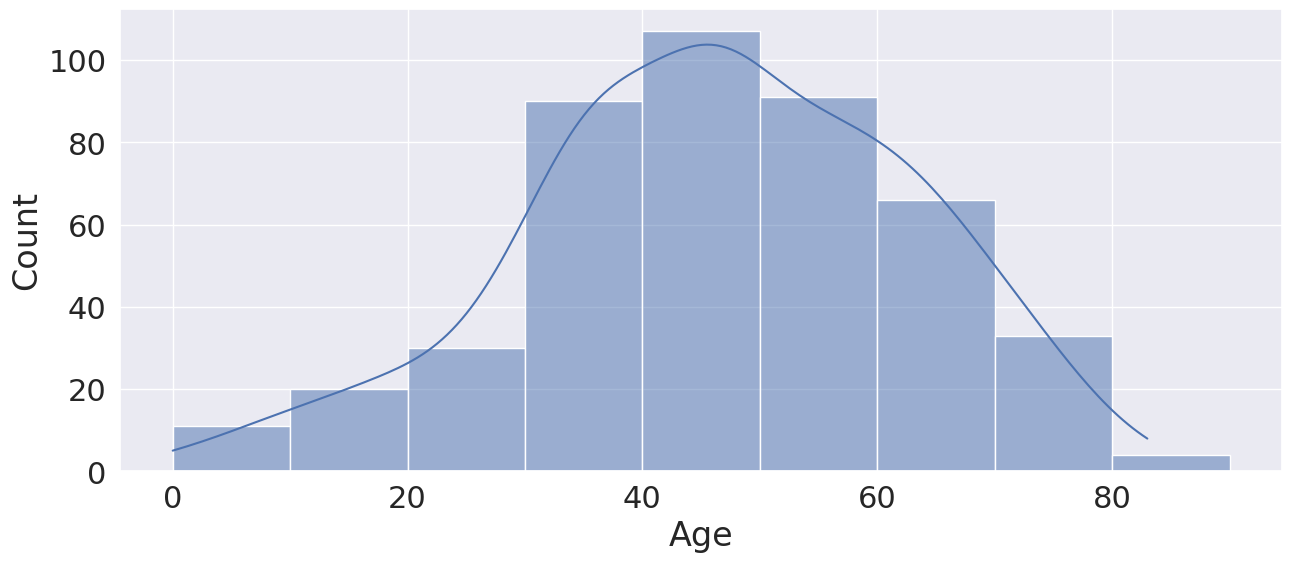

In [ ]:
# Age column
fig, ax = plt.subplots(figsize = (15, 6))
palette = sns.color_palette("muted")
sns.histplot(data = df, x = "Age", binwidth = 10, kde = True)
sns.set(font_scale = 2)

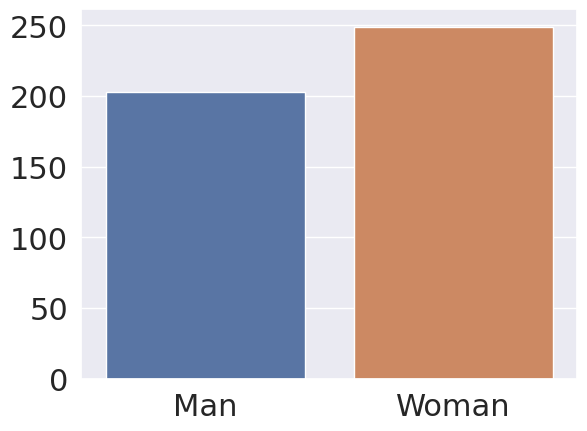

Total Man : 203
Total Woman : 249


In [ ]:
# Gender column
total_man = df['Gender'].value_counts()[0]
total_woman = df['Gender'].value_counts()[1]
sns.barplot(x=['Man', 'Woman'], y=[total_man, total_woman])
plt.show()
print(f'Total Man : {total_man}\nTotal Woman : {total_woman}')

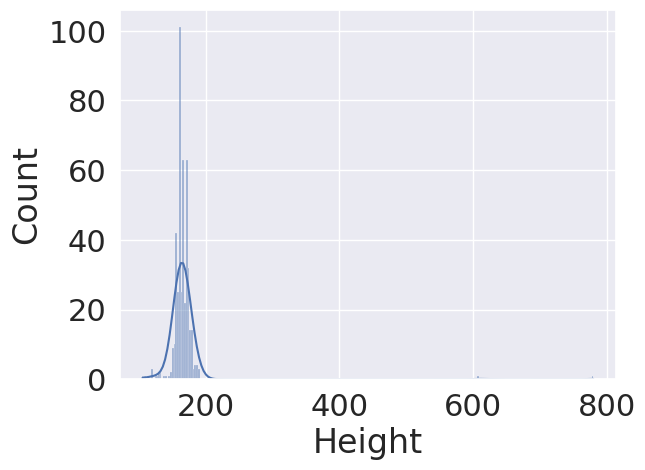

In [ ]:
# Height Column
sns.histplot(x='Height', data=df, kde=True)
plt.show()

terdapat data yang abnormal pada kolom Height, terdapat data yang Height terlalu tinggi.

In [ ]:
for i in df['Height'].unique():
  print(i, end="|\n")

190|
165|
172|
175|
169|
160|
162|
168|
167|
170|
150|
171|
158|
166|
153|
164|
163|
155|
176|
157|
156|
159|
110|
182|
161|
177|
185|
184|
132|
154|
186|
780|
173|
178|
179|
180|
133|
124|
174|
149|
130|
608|
105|
188|
181|
146|
120|
152|
127|
148|
119|
138|
140|


data tersebut kita ubah menjadi mean dari kolom Height

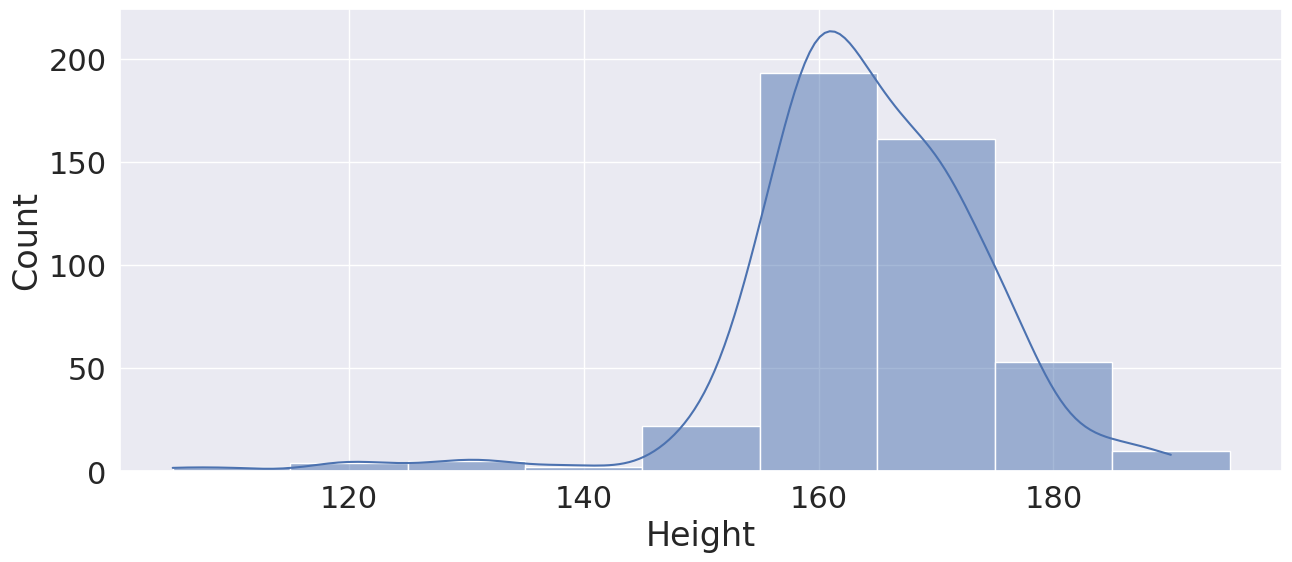

In [ ]:
df.loc[df["Height"] == 608, "Height"] = df['Height'].mean()
df.loc[df["Height"] == 780, "Height"] = df['Height'].mean()

# Fix Height Column
fig, ax = plt.subplots(figsize = (15, 6))
palette = sns.color_palette("muted")
sns.histplot(data = df, x = "Height", binwidth = 10, kde = True)
sns.set(font_scale = 2)

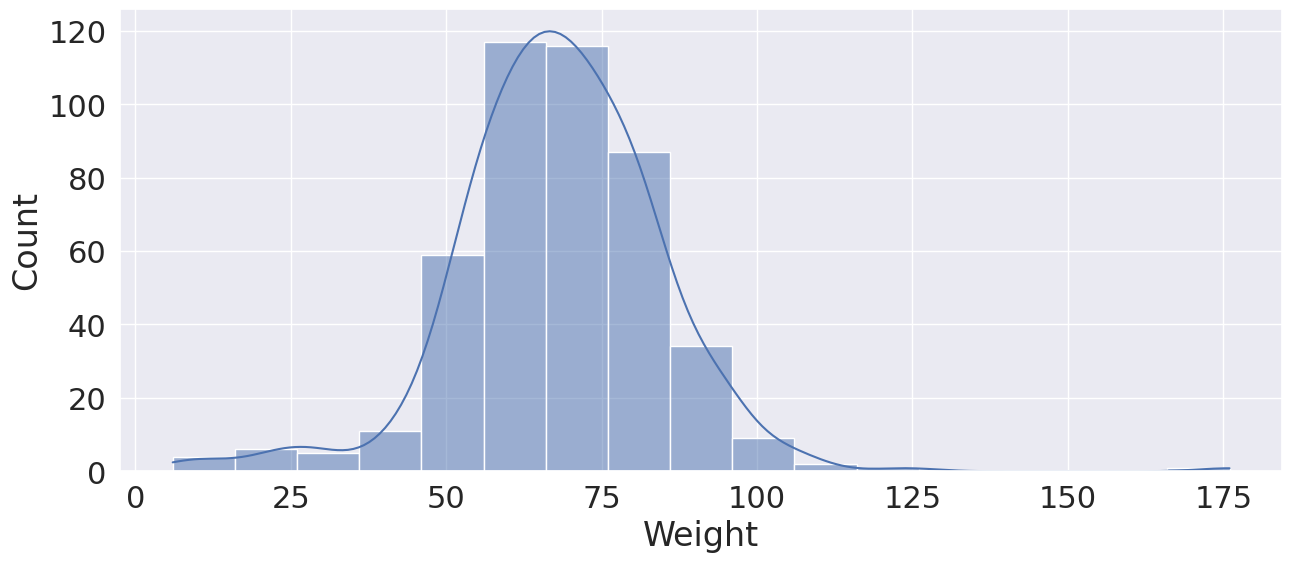

In [ ]:
# Weight Column
fig, ax = plt.subplots(figsize = (15, 6))
palette = sns.color_palette("muted")
sns.histplot(data = df, x = "Weight", binwidth = 10, kde = True)
sns.set(font_scale = 2)

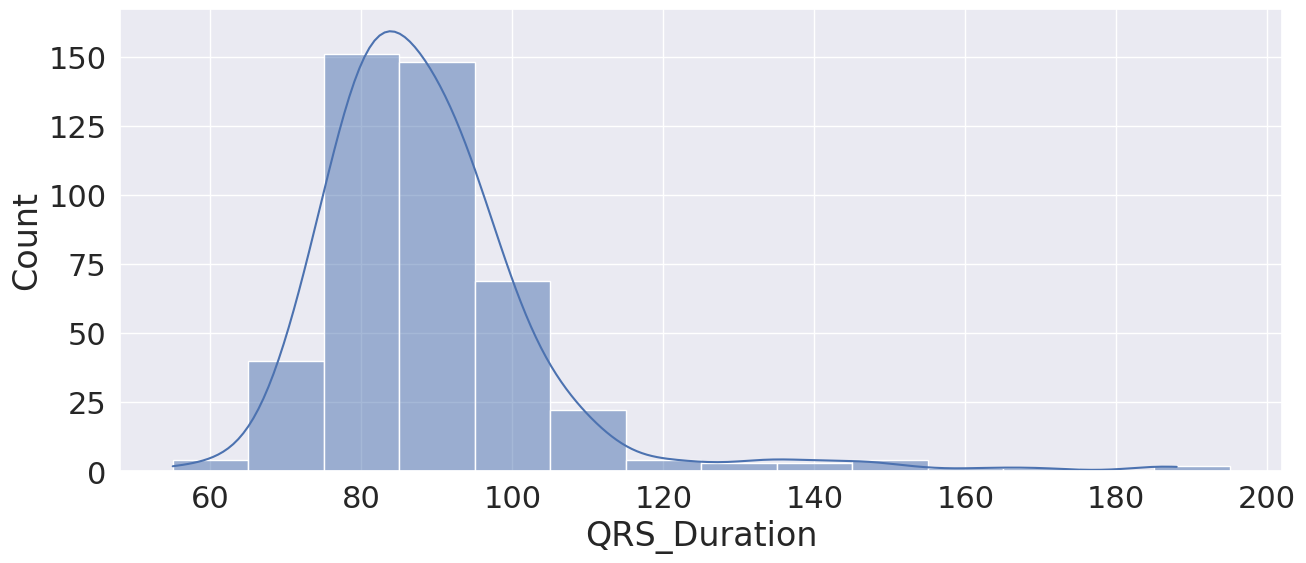

In [ ]:
# QRS Duration Column
fig, ax = plt.subplots(figsize = (15, 6))
palette = sns.color_palette("muted")
sns.histplot(data = df, x = "QRS_Duration", binwidth = 10, kde = True)
sns.set(font_scale = 2)

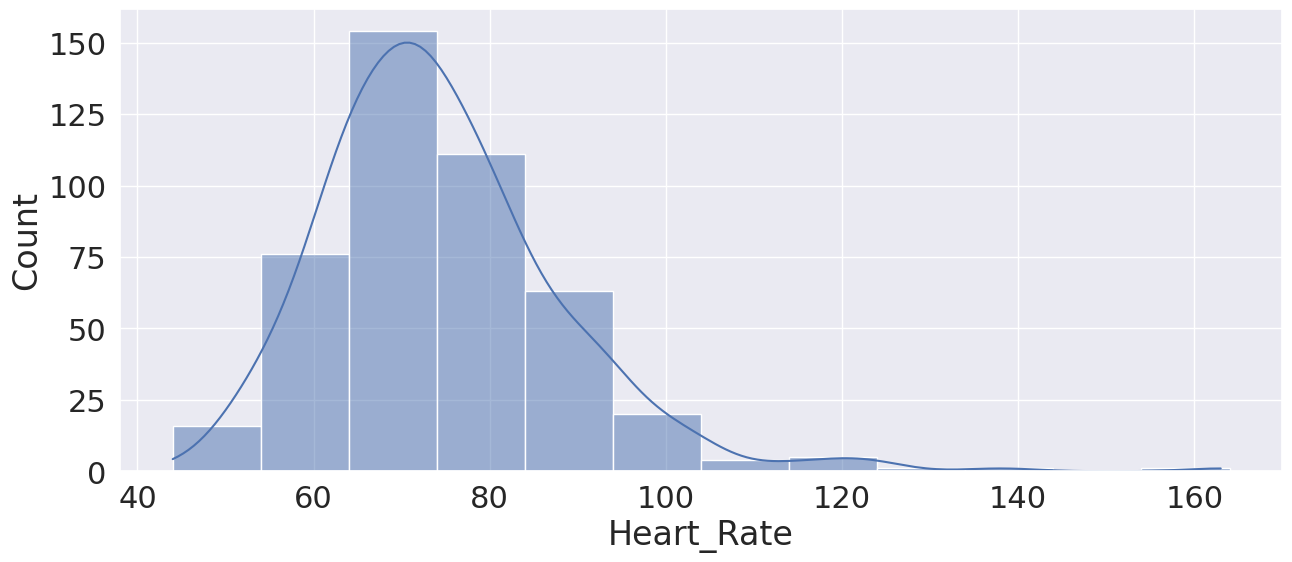

In [ ]:
# Heart Rate Column
fig, ax = plt.subplots(figsize = (15, 6))
palette = sns.color_palette("muted")
sns.histplot(data = df, x = "Heart_Rate", binwidth = 10, kde = True)
sns.set(font_scale = 2)

# KNN Approach

In [ ]:
df.describe()

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6,Class_Label
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,163.850439,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,0.457965
std,16.466631,0.497955,10.389866,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,0.498782
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,0.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,0.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,0.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,1.000000
max,83.000000,1.000000,190.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,1.000000


In [ ]:
df.shape

(452, 279)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 279 entries, Age to Class_Label
dtypes: float64(125), int64(154)
memory usage: 985.3 KB


In [ ]:
# Shuffle dataframe
def shuffle_df(df):
  return df.sample(len(df)).reset_index(drop=True)
df = shuffle_df(df)

In [ ]:
# Lakukan Fold Data (Cross Validation)
fold_1 = (df.iloc[0:113].reset_index(drop = True),
         df.iloc[113:len(df)].reset_index(drop = True)
        )
fold_2 = (df.iloc[113:227].reset_index(drop = True),
         pd.concat([df.iloc[0:113], df.iloc[227:len(df)]]).reset_index(drop = True)
        )
fold_3 = (df.iloc[339:len(df)].reset_index(drop = True),
         df.iloc[0:339].reset_index(drop = True)
        )
# Sample test and train
test, train = fold_2 # train data 75% | test data 25%
train

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6,Class_Label
0,47,0,171.0,59,82,145,347,169,61,77,...,0.0,9.4,-1.7,0.0,0.0,0.6,2.3,19.5,41.1,1
1,54,1,160.0,64,71,148,409,139,93,-5,...,0.0,6.0,-0.9,0.0,0.0,0.3,1.1,11.6,17.9,1
2,45,0,169.0,80,105,198,327,218,115,-62,...,-3.5,1.0,-5.0,0.0,0.0,1.3,-0.9,-16.4,-25.4,1
3,74,0,170.0,67,84,175,444,182,42,-27,...,0.0,7.6,0.0,0.0,0.0,0.5,1.2,19.7,29.5,1
4,19,1,157.0,40,98,176,343,132,144,169,...,-1.9,10.2,-2.8,0.0,0.0,1.1,1.3,9.4,17.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,38,1,172.0,61,94,165,401,149,97,-10,...,0.0,5.2,-1.1,0.0,0.0,0.5,2.0,9.4,27.0,1
334,58,1,148.0,65,85,140,431,179,94,71,...,0.0,9.7,-4.5,0.0,0.0,0.5,0.4,7.7,11.2,0
335,57,1,165.0,59,75,157,406,143,92,4,...,0.0,6.7,-0.5,0.0,0.0,0.4,1.1,18.4,28.9,0
336,39,1,155.0,59,91,171,387,117,93,73,...,-1.7,13.0,0.0,0.0,0.0,0.7,0.9,47.4,53.3,0


Sebelum dilakukan normalisasi pastikan kolom fitur dan class dipisahkan

In [ ]:
# Assign fitur dan target
X = df.drop('Class_Label', axis = 1) # Meng-assign fitur ke X
Y = df.Class_Label # Y sebagai target Class_Label

Normalisasi (agar tidak ada situasi dimana fitur (kolom tertentu) dengan rentang nilai yang lebih besar mendominasi perhitungan jarak daripada fitur dengan rentang nilai yang lebih kecil)

In [ ]:
# Normalization
def norm(df):
  df = (df - df.min()) / (df.max() - df.min() + 10**-100)
  return df

# Melakukan normalisasi untuk X (fitur-fitur)
X = norm(X)
X

,Age,Gender,Height,Weight,QRS_Duration,P-R_Interval,Q-T_Interval,T_Interval,P_interval,QRS,...,A_JJ_V6,A_Q_V6,A_R_V6,A_S_V6,A_R'_V6,A_S'_V6,A_P_V6,A_T_V6,QRSA_V6,QRSTA_V6
0,0.566265,0.0,0.776471,0.311765,0.203008,0.276718,0.415162,0.223443,0.297561,0.730205,...,0.626506,1.000000,0.398305,0.940559,0.0,0.0,0.43750,0.691667,0.478947,0.515858
1,0.650602,1.0,0.647059,0.341176,0.120301,0.282443,0.638989,0.113553,0.453659,0.489736,...,0.626506,1.000000,0.254237,0.968531,0.0,0.0,0.34375,0.591667,0.419549,0.365696
2,0.542169,0.0,0.752941,0.435294,0.375940,0.377863,0.342960,0.402930,0.560976,0.322581,...,0.855422,0.146341,0.042373,0.825175,0.0,0.0,0.65625,0.425000,0.209023,0.085437
3,0.891566,0.0,0.764706,0.358824,0.218045,0.333969,0.765343,0.271062,0.204878,0.425220,...,0.602410,1.000000,0.322034,1.000000,0.0,0.0,0.40625,0.600000,0.480451,0.440777
4,0.228916,1.0,0.611765,0.200000,0.323308,0.335878,0.400722,0.087912,0.702439,1.000000,...,0.518072,0.536585,0.432203,0.902098,0.0,0.0,0.59375,0.608333,0.403008,0.365696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.457831,1.0,0.788235,0.323529,0.293233,0.314885,0.610108,0.150183,0.473171,0.475073,...,0.674699,1.000000,0.220339,0.961538,0.0,0.0,0.40625,0.666667,0.403008,0.424595
448,0.698795,1.0,0.505882,0.347059,0.225564,0.267176,0.718412,0.260073,0.458537,0.712610,...,0.614458,1.000000,0.411017,0.842657,0.0,0.0,0.40625,0.533333,0.390226,0.322330
449,0.686747,1.0,0.705882,0.311765,0.150376,0.299618,0.628159,0.128205,0.448780,0.516129,...,0.759036,1.000000,0.283898,0.982517,0.0,0.0,0.37500,0.591667,0.470677,0.436893
450,0.469880,1.0,0.588235,0.311765,0.270677,0.326336,0.559567,0.032967,0.453659,0.718475,...,0.662651,0.585366,0.550847,1.000000,0.0,0.0,0.46875,0.575000,0.688722,0.594822


In [ ]:
# Menghitung jarak menggunakan euclidean distance
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

# Euclidean distance dari data baris pertama dan kedua
euclidean(X.iloc[0], X.iloc[1])

2.5264578932888226

In [ ]:
# Training KNN
def KNN(X_train, y_train, X_test, k): # k adalah banyaknnya ketetanggaan / neighbours
  dist = []
  # Menghitung distance dari data training dan data testing
  for row in range(X_train.shape[0]):
    dist.append(euclidean(X_train.iloc[row], X_test))

  data = X_train.copy()
  data['Dist'] = dist # Menambahkan data distance pada data
  data['Class_Label'] = y_train # Menambahkan class pada data
  data = data.sort_values(by = 'Dist').reset_index(drop = True) # Mengurutkan data berdasarkan distance

  # Mengambil label kelas yang sering muncul
  y_pred = data.iloc[:k].Class_Label.mode()

  return y_pred[0]

In [ ]:
# Menghitung akurasi dari output berdasarkan class
def acc(y_pred, y_true):
  true = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      true += 1

  return true/len(y_pred)

In [ ]:
# Evaluasi mode dengan data fold
def evaluate(fold, k):
  test, train = fold

  X_train, y_train = train.drop('Class_Label', axis = 1), train.Class_Label
  X_test, y_test = test.drop('Class_Label', axis = 1), test.Class_Label
  X_train = norm(X_train)
  X_test = norm(X_test)

  y_preds = []
  for row in range(X_test.shape[0]):
    y_preds.append(KNN(X_train, y_train, X_test.iloc[row], k))

  return (acc(y_preds, y_test))

In [ ]:
k = 5
accs = []
folds = [fold_1, fold_2, fold_3]
for i in range(len(folds)):
  accs.append(evaluate(folds[i], k))
print(f'akurasi fold 1 : {accs[0]}')
print(f'akurasi fold 2 : {accs[1]}')
print(f'akurasi fold 3 : {accs[2]}')
print(f'Menggunakan k : {k}, dengan rata-rata akurasi total : {sum(accs) / 3}')

akurasi fold 1 : 0.672566371681416
akurasi fold 2 : 0.6754385964912281
akurasi fold 3 : 0.6991150442477876
Menggunakan k : 5, dengan rata-rata akurasi total : 0.6823733374734772


# Hyper Parameter (tidak perlu Tidak apa") Tidak jadi digunakan
n_neightbors = adalah hyperparameter yang menentukan jumlah tetangga terdekat (K) yang akan digunakan untuk mengambil keputusan klasifikasi atau regresi.

Weights = adalah Hyperparameter yang menentukan cara memberikan bobot kepada tetangga terdekat saat menghitung prediksi.

'uniform': Memberikan bobot yang sama untuk semua tetangga terdekat.

'distance': Memberikan bobot berdasarkan jarak, yaitu tetangga yang lebih dekat akan memiliki pengaruh yang lebih besar pada prediksi.

metric: Hyperparameter ini menentukan metrik jarak yang digunakan dalam perhitungan KNN.

'euclidean': Jarak Euclidean.

'manhattan': Jarak Manhattan.

'minkowski': Jarak Minkowski dengan parameter p yang ditentukan. (p>2)

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [2,3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

'''

"\nfrom sklearn.model_selection import GridSearchCV\ngrid_params = { 'n_neighbors' : [2,3,5,7,9,11,13,15],\n               'weights' : ['uniform','distance'],\n               'metric' : ['minkowski','euclidean','manhattan']}\n\n"

In [ ]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=452)
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\n\nX_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=452)\ngs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)\ng_res = gs.fit(X_train, y_train)\n'

In [ ]:
#print("Nilai akurasi setelah dilakukan Hyper parameter : ",g_res.best_score_)

In [ ]:
#print("Nilai akurasi sangat dipengaruhi oleh parameter : ",g_res.best_params_)